In [1]:
import qiskit.aqua.components.variational_forms as vf
import math
from qiskit.aqua import QuantumInstance
from qiskit.aqua.operators import WeightedPauliOperator
from qiskit.aqua.utils.run_circuits import find_regs_by_name
from qiskit.quantum_info import Pauli
from qiskit import Aer, QuantumCircuit
import numpy as np

nqbits = 2
depth = 4
theta_params = [math.pi/3]*(nqbits*depth)
theta_params[2] = 0.45

# ansantz = vf.RY(num_qubits=nqbits, depth=depth, skip_final_ry=True)
# print(ansantz._num_parameters)
# ansantz = ansantz.construct_circuit(parameters=[0]*(nqbits*depth))
# ansantz.draw(output='mpl')

In [2]:
def get_subcricuit(num_qbits, theta_params, layer):
    assert layer >= 0
    p = theta_params[0:num_qbits*layer]
    print(p)
    circ = vf.RY(num_qubits=nqbits, depth=layer, skip_final_ry=True)
    return circ.construct_circuit(parameters=p)

[1.0471975511965976, 1.0471975511965976]


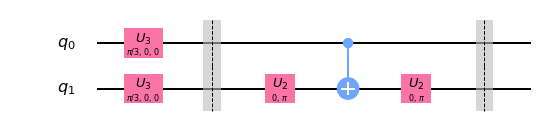

In [3]:
c1 = get_subcricuit(nqbits, theta_params, 1)
c1.draw(output='mpl')

[1.0471975511965976, 1.0471975511965976, 0.45, 1.0471975511965976]


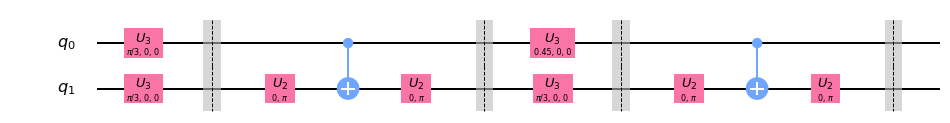

In [4]:
c2 = get_subcricuit(nqbits, theta_params, 2)
c2.draw(output='mpl')

[1.0471975511965976, 1.0471975511965976, 0.45, 1.0471975511965976, 1.0471975511965976, 1.0471975511965976]


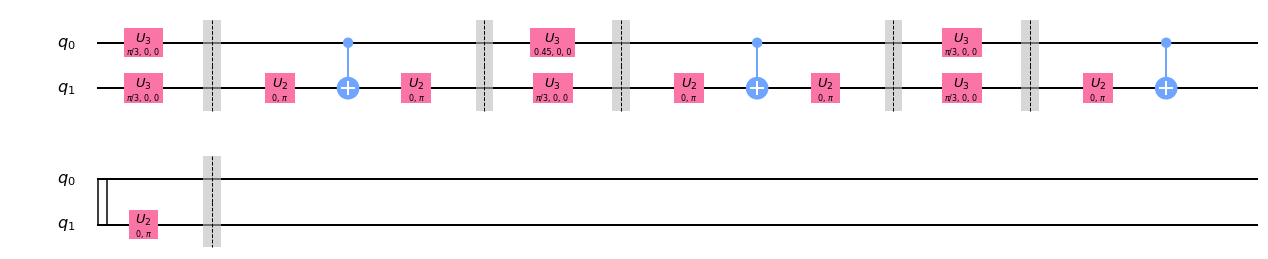

In [5]:
c3 = get_subcricuit(nqbits, theta_params, 3)
c3.draw(output='mpl')

[1.0471975511965976, 1.0471975511965976, 0.45, 1.0471975511965976, 1.0471975511965976, 1.0471975511965976, 1.0471975511965976, 1.0471975511965976]


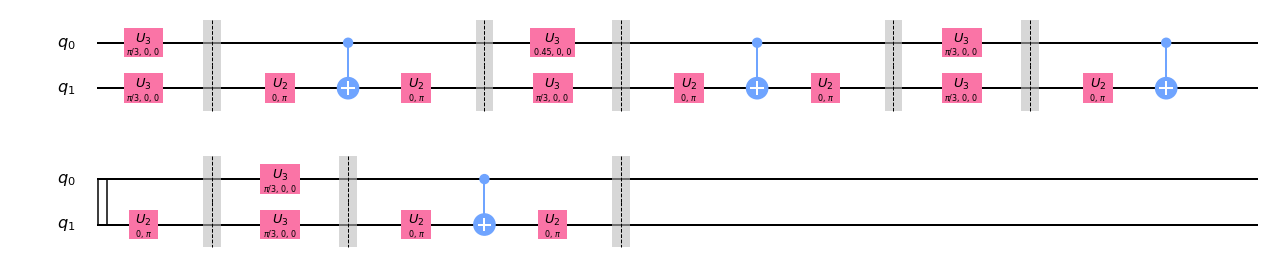

In [6]:
c4 = get_subcricuit(nqbits, theta_params, 4)
c4.draw(output='mpl')

In [7]:
def calc_expectataion(pauli_str, sub_circuit):
    pauli = pauli_str 
    qubit_op = WeightedPauliOperator([[1, Pauli.from_label(pauli)]])
    sv_mode = False
    
    # qi = QuantumInstance(backend=Aer.get_backend('statevector_simulator'), shots=1, seed_simulator=100, seed_transpiler=2)
    qi = QuantumInstance(backend=Aer.get_backend('qasm_simulator'),
                         shots=1,
                         seed_simulator=100,
                         seed_transpiler=2)
    
    if qi.is_statevector:
        sv_mode = True
    
    # Make sure that the eval quantum/ classical registers in the circuit are named 'q'/'c'    
    qc = qubit_op.construct_evaluation_circuit(statevector_mode=sv_mode,
                                               wave_function=sub_circuit,
                                               qr=find_regs_by_name(sub_circuit, 'q'),
                                               use_simulator_operator_mode=True)
    
    result = qi.execute(qc)
    avg, std = qubit_op.evaluate_with_result(statevector_mode=sv_mode,
                                             result=result,
                                             use_simulator_operator_mode=True)
    
    return avg

pauli_str = 'I'*nqbits

circs = [c1, c2, c3, c4]
QMT = []

for circ in circs:
    QMT.append(1-calc_expectataion('YI', circ)**2)
    QMT.append(1-calc_expectataion('IY', circ)**2)

print(np.diag(QMT))

QiskitError: 'Data for experiment "aer_mode" could not be found.'

In [ ]:
# circuit = QuantumCircuit(1)
# circuit.h(0)
# circuit.draw(output='mpl')

In [ ]:
# e = calc_expectataion('Y', circuit)
# print(e)